## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi


Github주소 : https://github.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning

## I. Importing essential libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/AI/프로젝트/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
dataset.shape #dataset은 303개의 행과 14개의 열을 가지고 있다.

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5) # 상위 5개 데이터 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5) #랜덤한 5개 데이터 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0


#### Description

In [ ]:
dataset.describe() #데이터 기초통계정보 확인

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info() #데이터 요약정보 확인, 결측치가 없음을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


##데이터 소개


*   age : 환자의 나이
*   sex : 환자의 성별(0=여성, 1=남성)
*   cp : 흉통 유형(1=정형적 협심증, 2=비정형 협심증, 3=협심증이 아닌 통증, 4= 무증상)
*  trestbps: 안정 시 혈압
*  chol : 콜레스테롤(mg/dl)
*  fbs : 공복 혈당 > 120mg/dl (0=False, 1=True)
*  restecg : 안정 시 심전도 결과(0=Normal, 1=ST-T파 정상(T파 역전 또는 0.05mV 이상의 ST 상승 또는 하강)이 있음, 2=좌심실 비대)
*  thalachh : 최대 심박수 달성
*  oldpeak : 비교적 안정될 때까지 운동으로 유발되는 ST depression 이전 최고치
*  slope : 최대 운동 ST segment의 기울기
*  ca : 주요 혈관
*  thal : 탈륨 스트레스 테스트 결과 (3=정상, 6=수정된 결함, 7=되돌릴 수 있는 결함)
*  target : 목표 변수(0=심장마비 가능성 낮음, 1=심장마비 가능성 높음)


#### Analysing the 'target' variable

타겟 변수 분석

In [ ]:
dataset["target"].describe() #target 기초통계량

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique() #target 고유값

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False)) #target과 각 변수들의 상관관계 분석

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#가장 상관관계가 높은 변수는 exang, 가장 낮은 변수는 fbs이다.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


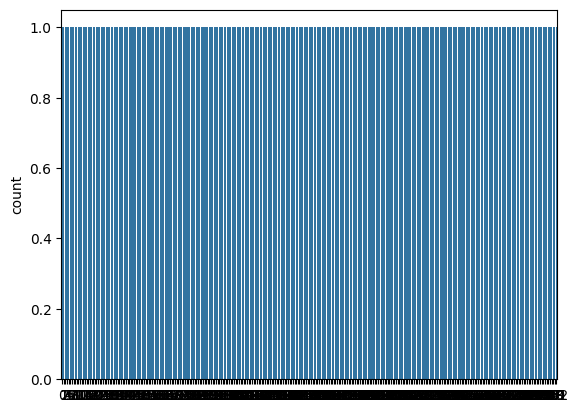

In [ ]:
#target 빈도 그래프화 0(심장마비 가능성 낮음)은 138개, 1(심장마비 가능성 높음)은 165개임을 확인할 수 있다.
y = dataset["target"]

sns.countplot(y)

target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#심장마비 가능성이 낮은 환자는 45.54%, 심장마비 가능성이 있는 환자는 54.46%이다.

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

In [ ]:
sns.barplot(dataset["sex"],y)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].unique()

##### As expected, the CP feature has values from 0 to 3

In [ ]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

In [ ]:
dataset["fbs"].unique()

In [ ]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

In [ ]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

In [ ]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

In [ ]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

In [ ]:
sns.countplot(dataset["ca"])

In [ ]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

In [ ]:
sns.barplot(dataset["thal"],y)

In [ ]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

# 학습데이터 80%, 테스트 사이즈 20%로 데이터 분리
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
# 로지스틱 회귀의 정확도는 85.25%이다.

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

### SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

####첫 번째 Dense 레이어 : Dense(11, activation='relu', input_dim=11)
*   Dense(11): 이 레이어는 11개의 뉴런(유닛)을 갖는 완전 연결 레이어입니다. 레이어의 출력은 11개의 뉴런으로 구성됩니다.
*   activation='relu': 이 레이어는 ReLU(Rectified Linear Unit) 활성화 함수를 사용합니다. ReLU는 출력값을 0 이상으로 만들고, 음수 값을 0으로 변환하는 비선형 활성화 함수입니다. 이를 통해 비선형성을 모델에 추가합니다
*   input_dim=13: 이 레이어는 입력으로 13개의 특성을 받도록 설정되어 있습니다. 입력 데이터의 형상이 (batch_size, 13)이 됩니다. 여기서 batch_size는 한 번에 처리할 데이터 샘플의 수를 나타내며, 13은 각 샘플의 특성(피처) 수를 나타냅니다.

#### 두 번째 Dense 레이어 : model.add(Dense(1, activation='sigmoid'))
*   Dense(1): 이 레이어는 1개의 뉴런을 갖는 완전 연결 레이어입니다. 이 레이어의 출력은 1개의 뉴런으로 구성됩니다.
*   activation='sigmoid': 이 레이어는 시그모이드(Sigmoid) 활성화 함수를 사용합니다. 시그모이드는 출력값을 0과 1 사이로 변환합니다. 주로 이진 분류 문제에서 사용됩니다.

###전체적인 구조
입력 레이어: 첫 번째 Dense 레이어는 입력으로 13개의 특성을 받습니다.
은닉 레이어: 첫 번째 Dense 레이어는 11개의 뉴런을 가지며, ReLU 활성화 함수를 사용하여 입력 데이터를 처리합니다.
출력 레이어: 두 번째 Dense 레이어는 1개의 뉴런을 가지며, 시그모이드 활성화 함수를 사용하여 최종 출력을 생성합니다. 이 출력은 0과 1 사이의 값을 가지므로, 이진 분류 문제에 적합합니다.

In [ ]:
model.fit(X_train,Y_train,epochs=300,verbose=0)

In [ ]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.
#뉴런 네트워크의 정확도는 83.61%이다.

The accuracy score achieved using Neural Network is: 83.61 %


## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>